## Финальное соревнование

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), @neychev

В данном задании вас ждет неизвестная зависимость. Ваша основная задача: **построить две лучших модели**, минимизирующих среднеквадратичную ошибку (MSE):
1. На первую модель не налагается ограничений.
2. Вторая модель должна быть **линейной**, т.е. представлять собой линейную комбинацию признаков плюс свободный член: $\boldsymbol{w}^{\top}\boldsymbol{x} + b$. При этом __вы можете использовать базовые математические операции для преобразования признаков__: np.exp, np.log, np.pow (полный список доступен в [документации](https://numpy.org/doc/stable/reference/routines.math.html)), а также линейные операции над ними (сумма, умножение на число и пр.). Для преобразования признаков вам будет необходимо написать функцию `my_transformation`. __Кол-во параметров (весов) используемых второй моделью не должно превышать 15 (включая свободный член).__

Настоятельно рекомендуем написать код "с нуля", лишь поглядывая на готовые примеры, а не просто "скопировать-вставить". Это поможет вам в будущем писать код более уверенно

In [1]:
import os
import json

import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Загрузка данных происходит ниже. Если она не срабатывает, самостоятельно скачайте файл `hw_final_open_data.npy` и положите его в ту же директорию, что и ноутбук.

In [3]:
# !wget https://raw.githubusercontent.com/girafe-ai/ml-course/23f_yandex_ml_trainings/homeworks/assignment_final/hw_final_open_data.npy -O hw_final_open_data.npy
# !wget https://raw.githubusercontent.com/girafe-ai/ml-course/23f_yandex_ml_trainings/homeworks/assignment_final/hw_final_open_target.npy -O hw_final_open_target.npy

In [2]:
assert os.path.exists('hw_final_open_data.npy'), 'Please, download `hw_final_open_data.npy` and place it in the working directory'
assert os.path.exists('hw_final_open_target.npy'), 'Please, download `hw_final_open_target.npy` and place it in the working directory'
data = np.load('hw_final_open_data.npy', allow_pickle=False)
target = np.load('hw_final_open_target.npy', allow_pickle=False)

In [4]:
data.shape

(800, 7)

Разбивка на `train` и `val` опциональна и сделана для вашего удобства.

In [5]:
train_x, valid_x, train_y, valid_y = train_test_split(data, target, test_size=0.3)

### Модель №1
Напоминаем, в первой части задания ваша основная задача – получить наилучший результат без ограничений на модель. Сдаваться будут только предсказания модели.

Пример с использованием Random Forest доступен ниже.

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [13]:
model = nn.Sequential(
    nn.Linear(7,32),
    nn.ELU(),
    nn.Linear(32,64),
    nn.ELU(),
    nn.Linear(64,16),
    nn.ELU(),
    nn.Linear(16,1)

)

In [17]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

TypeError: expected string or bytes-like object

In [ ]:
epochs = 10

train_loss = []
val_loss = []

for epoch in range(epochs):
    #train phase
    model.train()
    
    #zeros grads
    optimizer.zero_grad()
    
    #get outputs
    outputs = model(train_x)
    #get loss
    loss = criterion(outputs,train_y)
    
    #backward and optimization
    loss.backward()
    optimizer.step()
    
    #add train_loss to tracker
    train_loss.append(loss.item())
    
    #val phase
    model.eval()
    
    with torch.no_grad():
         #get outputs
        outputs = model(valid_x)
        #get loss
        loss = criterion(outputs,valid_y)
        #add valid_loss to tracker
        val_loss.append(loss.item())

    print(
        f'Train mse on {epoch} epoch = \t {train_loss[-1]}',
        f'Valid mse on {epoch} epoch = \t {val_loss[-1]}',
    )

In [9]:
rf = RandomForestRegressor()
rf.fit(train_x, train_y)

print(
    f'train mse =\t {mean_squared_error(np.round(rf.predict(train_x), 2), np.round(train_y)):.5f}',
    f'validation mse = {mean_squared_error(np.round(rf.predict(valid_x)), np.round(valid_y)):.5f}',
    sep='\n'
)

train mse =	 0.10121
validation mse = 0.33750


##### Сдача первой части соревнования
Загрузите файл `hw_final_closed_data.npy` (ссылка есть на странице с заданием). Если вы используете sklearn-совместимую модель, для генерации посылки вы можете воспользоваться функцией `get_predictions`. В ином случае перепишите функцию для вашей модели и запустите код под следующей ячейкой для генерации посылки.

In [6]:
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/23f_yandex_ml_trainings/homeworks/assignment_final/hw_final_closed_data.npy -O hw_final_closed_data.npy

--2023-12-03 09:52:54--  https://raw.githubusercontent.com/girafe-ai/ml-course/23f_yandex_ml_trainings/homeworks/assignment_final/hw_final_closed_data.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11328 (11K) [application/octet-stream]
Saving to: ‘hw_final_closed_data.npy’

hw_final_closed_dat 100%[===================>]  11.06K  --.-KB/s    in 0s      

2023-12-03 09:52:54 (72.3 MB/s) - ‘hw_final_closed_data.npy’ saved [11328/11328]



In [7]:
assert os.path.exists('hw_final_closed_data.npy'), 'Please, download `hw_final_closed_data.npy` and place it in the working directory'
closed_data = np.load('hw_final_closed_data.npy', allow_pickle=False)

Если необходимо, преобразуйте данные. Преобразованную матрицу объект-признак сохраните в переменную `closed_data`.

In [ ]:
# optional transformations

In [8]:
def get_predictions(model, eval_data, step=10):
    predicted_values = model.predict(eval_data)
    return predicted_values

Обращаем ваше внимание, предсказания округляются до сотых!

In [9]:
predicted_values = np.round(get_predictions(model=rf, eval_data=closed_data), 2)

assert predicted_values.shape == (closed_data.shape[0], ) # predictions should be just one-dimensional array

In [10]:
# do not change the code in the block below
# __________start of block__________
def float_list_to_comma_separated_str(_list):
    _list = list(np.round(np.array(_list), 2))
    return ','.join([str(x) for x in _list])

submission_dict = {
    'predictions': float_list_to_comma_separated_str(predicted_values)
}
with open('submission_dict_final_p01.json', 'w') as iofile:
    json.dump(submission_dict, iofile)

print('File saved to `submission_dict_final_p01.json`')
# __________end of block__________

File saved to `submission_dict_final_p01.json`


### Модель №2
Функция `my_transformation` принимает на вход матрицу объект-признак (`numpy.ndarray` типа `np.float`) и преобразует ее в новую матрицу. Данная функция может использовать только numpy-операции, а также арифметические действия.

Для примера доступна функция ниже. Она лишь добавляет новый признак, представляющий собой произведение первого и второго исходных признаков (считая с нуля).

In [58]:
def my_transformation(feature_matrix: np.ndarray):
    #удаляем 3 и 7 фичу
    features_to_del = [2,6]
    feature_matrix = np.delete(feature_matrix,features_to_del,axis=1)
    #baseline
    new_feature_matrix = np.zeros((feature_matrix.shape[0], feature_matrix.shape[1]+1))
    new_feature_matrix[:, :feature_matrix.shape[1]] = feature_matrix
    new_feature_matrix[:, -1] = feature_matrix[:, 0] * feature_matrix[:, 1]
    return new_feature_matrix

In [59]:
transformed_train_x = my_transformation(train_x)

In [60]:
train_x.shape,transformed_train_x.shape

((560, 7), (560, 6))

In [30]:
train_x[:,0].shape

(560,)

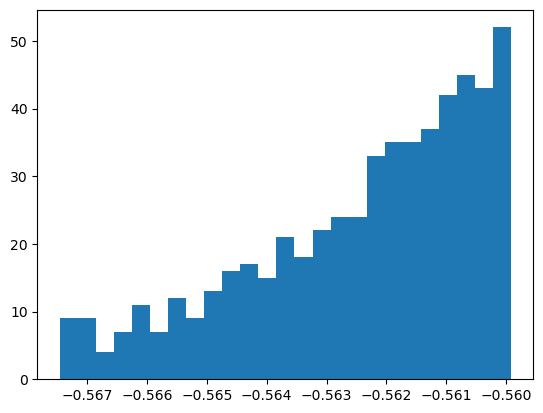

In [32]:
plt.hist(train_x[:,0],bins=25)

plt.title('First feature')

plt.show()

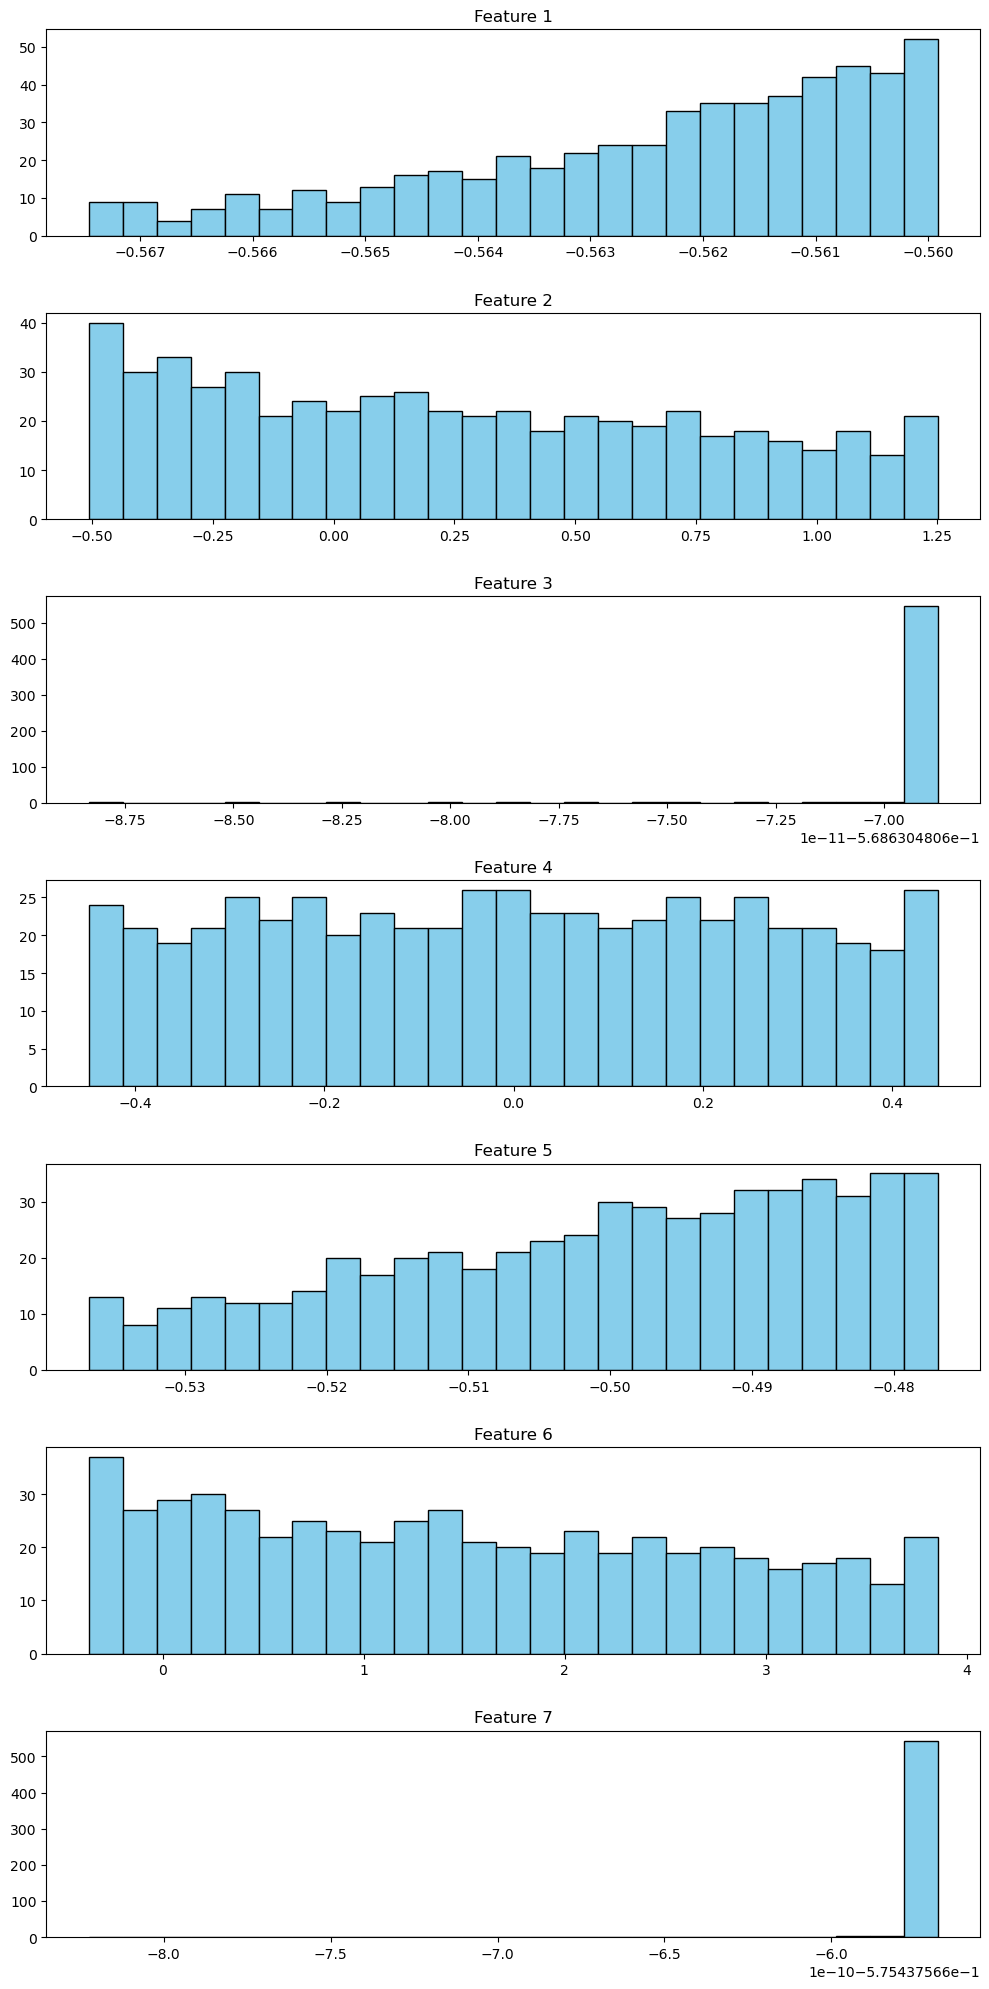

In [35]:
fig, axs = plt.subplots(7, 1, figsize=(10, 20))

# Plotting histograms for each feature
for i in range(7):
    axs[i].hist(train_x[:, i], bins=25, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Feature {i+1}')

plt.tight_layout()
plt.show()

In [63]:
train_x_mod = 

In [69]:
import pandas as pd
import seaborn as sns

In [84]:
df = pd.DataFrame(np.column_stack([train_x_mod,train_y]),columns=['f_1','f_2','f_3','f_4','f_5','target'])
df

,f_1,f_2,f_3,f_4,f_5,target
0,-0.560856,0.659377,0.207601,-0.487336,2.488306,5.914788
1,-0.560452,0.886953,0.303445,-0.482974,3.017429,6.560100
2,-0.560416,0.908836,0.312429,-0.482580,3.068073,6.383151
3,-0.563884,-0.235324,-0.242150,-0.514285,0.339868,1.228009
4,-0.561653,0.307857,0.048805,-0.495345,1.660400,4.132624
...,...,...,...,...,...,...
555,-0.560598,0.800343,0.267506,-0.484574,2.816602,6.348300
556,-0.564470,-0.312156,-0.292226,-0.518553,0.145769,0.893989
557,-0.559994,1.193727,0.426217,-0.477786,3.724081,7.958538
558,-0.560323,0.967637,0.336386,-0.481541,3.203964,6.836456


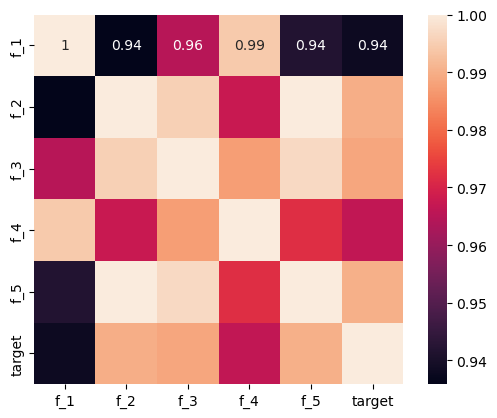

In [85]:
corrmat =  df.corr()
sns.heatmap(corrmat, square=True,annot=True);

plt.show()

In [86]:
corrmat.sort_values(by='target', ascending=True)['target']

f_1       0.938017
f_4       0.966246
f_3       0.988492
f_2       0.989757
f_5       0.990211
target    1.000000
Name: target, dtype: float64

Как мы можем видеть, 3 и 7 фича бесполезны

In [91]:
def my_trsn(feature_matrix: np.ndarray):
    return feature_matrix[:,5].reshape(-1, 1)
    

In [100]:
transformed_train_x = my_trsn(train_x)

In [101]:
lr = Ridge(solver='svd')
lr.fit(transformed_train_x, train_y)

print(
    f'train mse =\t {mean_squared_error(lr.predict(transformed_train_x), train_y):.5f}',
    f'validation mse = {mean_squared_error(lr.predict(my_trsn(valid_x)), valid_y):.5f}',
    sep='\n'
)

train mse =	 0.09348
validation mse = 0.08497


Обращаем ваше внимание, что параметры линейной модели будут округляться до __четырех знаков после запятой__. Это не должно сильно повлиять на качество предсказаний:

In [102]:
original_predictions = lr.predict((my_trsn(train_x)))
rounded_predictions = transformed_train_x.dot(np.round(lr.coef_, 4)) + np.round(lr.intercept_, 4)


assert np.allclose(original_predictions, rounded_predictions, atol=1e-3)

Параметры вашей модели:

In [103]:
w_list = list(np.round(lr.coef_, 4))
print(f'w = {list(np.round(lr.coef_, 4))}\nb = {np.round(lr.intercept_, 4)}')

w = [1.7633]
b = 1.0328


Напоминаем, ваша модель не должна использовать более 15 параметров (14 весов плюс свободный член).

In [97]:
assert len(w_list) + 1 <= 15

##### Сдача второй части соревнования
Для сдачи вам достаточно отправить функцию `my_transformation` и параметры вашей модели в контест в задачу №2. Пример посылки доступен ниже. Имортирование `numpy` также необходимо.

In [104]:
# __________example_submission_start__________
import numpy as np
def my_transformation(feature_matrix: np.ndarray):
    return feature_matrix[:,5].reshape(-1, 1)

w_submission = [1.7633]
b_submission = 1.0328
# __________example_submission_end__________

На этом задание завершено. Поздравляем!